## Exploratory Data Analysis of the HCV dataset.
### Link: https://www.kaggle.com/datasets/fedesoriano/hepatitis-c-dataset

Data description:
73 patients (52 male, 21 female), aged 19 to 75 years (median 50), diagnosed with hepatitis C. Morphological images for people without fibrosis to the final stage, i.e. cirrhosis with the need for liver transplantation (LTX). Divided into 3 classes: C1 - hepatitis without fibrosis or with slight symptoms of portal fibrosis, C2 - fibrosis important for fibrosis therapy, C3 - liver cirrhosis.

All features except Category and Sex are numerical. The laboratory data are the feautres 5-14.

1) X (Patient ID/No.)

2) Category (diagnosis) (values: '0=Blood Donor' 0, '0s=suspect Blood Donor' 1, **'1=Hepatitis' 2, '2=Fibrosis' 3, '3=Cirrhosis' 4) [should I make it into two categories???]**

3) Age (in years)

4) Sex (f,m) - m = 1, f = 0

**5) ALB - albumin**

6) ALP - alkaline phosphatase

**7) ALT – alanine aminotransferase**

**8) AST – aspartate aminotransferase**

**9) BIL – bilirubin**

**10) CHE – choline esterase**

11) CHOL - cholesterol

12) CREA - creatinine

**13) GGT - γ-glutamyl-transferase (Gamma-glutamyltransferase)**

14) PROT? proteinogram

The target attribute for classification is Category (blood donors vs. Hepatitis C (including its progress ('just' Hepatitis C, Fibrosis, Cirrhosis).

'1=Hepatitis', '2=Fibrosis', '3=Cirrhosis' – different stages of HCV infection


**Important terminology:**
- **alanine aminotransferase (ALT):** ALT is an enzyme found in the liver that helps convert proteins into energy for liver cells. When the liver is damaged, ALT is released into the bloodstream and levels rise.
- **aspartate aminotransferase (AST):** AST is an enzyme that helps metabolize amino acids. Like ALT, AST is usually present in the blood at low levels. An increase in AST levels may indicate liver damage, disease or muscle damage.
- **Alkaline Phosphatase (ALP):** ALP is an enzyme found in the liver and bones that is important for the breakdown of proteins. Higher than normal ALP levels may indicate liver damage or disease such as a blocked bile duct or certain bone diseases.
- **Albumin and total protein:**: Albumin is one of several proteins produced in the liver. The human body needs these proteins, among others. to fight infection. Lower than normal levels of albumin and total protein may indicate liver damage or disease.
- **Bilirubin:** Bilirubin is a substance produced during the normal breakdown of red blood cells. Bilirubin passes through the liver and is excreted in the feces. Elevated bilirubin levels (jaundice) may indicate liver damage or disease, or certain types of anemia.
- **Gamma-glutamyltransferase (GGT):** GGT is an enzyme in the blood. Higher than normal levels may indicate damage to the liver or bile ducts.

Source:
Publication: Lichtinghagen R et al. J Hepatol 2013; 59: 236-42
Hoffmann G et al. Using machine learning techniques to generate laboratory diagnostic pathways – a case study. J Lab Precis Med 2018; 3: 58-67
The original work used the decision tree method. They worked in R. Two machine learning algorithms - rpart and ctree (from the R program package [www.r-project.org](http://www.r-project.org/)). Validation: leave-one-out method.
Cirrhosis – cirrhosis of the liver. Liver fibrosis – fibrosis of the liver. FIB – fibrosis score, LTX – candidate for liver transplantation. Decision trees are automatically generated for real laboratory test results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
%matplotlib inline

In [2]:
# load dataset
hcv = pd.read_csv('hcvdat.csv')
hcv.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [3]:
# I remove the Unnamed:0 column because it is not needed
hcv.drop('Unnamed: 0', axis = 1, inplace = True)
hcv.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


### The categories are divided into 4 groups:
### Category (diagnosis) (values: '0=Blood Donor' 0, '0s=suspect Blood Donor' 1, '1=Hepatitis' 2, '2=Fibrosis' 3, '3=Cirrhosis' 4)
### 0 - healthy people, 0s - suspect healthy people, '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis' - various stages of HCV infection

In [4]:
hcv.loc[hcv['Category'].isin(['0s=suspect Blood Donor'])] # I locate lines with suspected healthy blood donors
# hcv.loc[533:539]

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
533,0s=suspect Blood Donor,47,m,22.5,124.0,79.5,46.7,2.3,6.83,4.30,170.0,345.6,58.6
534,0s=suspect Blood Donor,48,m,24.9,116.9,49.2,24.3,4.9,3.44,5.25,29.0,83.0,47.8
535,0s=suspect Blood Donor,49,m,21.6,42.2,9.5,10.6,2.4,3.75,3.01,64.0,38.9,44.8
536,0s=suspect Blood Donor,55,m,47.3,106.0,208.8,130.6,0.8,14.80,8.08,76.0,71.6,78.3
537,0s=suspect Blood Donor,71,m,14.9,69.8,19.7,95.2,9.8,13.30,2.61,9.0,7.6,47.0
538,0s=suspect Blood Donor,74,m,20.3,84.0,22.8,43.0,5.7,4.91,3.19,52.0,218.3,47.8
539,0s=suspect Blood Donor,59,f,19.3,208.2,325.3,146.6,6.9,5.33,4.72,32.0,295.6,53.1


In [5]:
hcv.shape # 615 objects, 13 columns

(615, 13)

In [6]:
hcv.columns.values

array(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT'], dtype=object)

In [7]:
hcv.Category.value_counts() # 533 healthy people, 7 suspected to be healthy, 75 sick people -> small sample of sick people

Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64

In [8]:
hcv.info() # I check the data type; Category, Sex are data of object type. In the following part, I'll have to change them to numeric data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


In [9]:
hcv.describe(include='object')

,Category,Sex
count,615,615
unique,5,2
top,0=Blood Donor,m
freq,533,377


In [10]:
print(hcv.isna().sum())
print(hcv.isin({0}).sum())

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64
Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64


### There are missing data that I need to address first. Before changing data types. ### No value 0. I'll replace NaN with 0 so I can change data types, and then I'll deal with 0.

In [70]:
numerical_columns = hcv.select_dtypes(include=['number']).columns
# Replacing NaN with 0
hcv[numerical_columns] = hcv[numerical_columns].fillna(0)
# Display information
print(hcv.isna().sum())
print(hcv.isin({0}).sum())

Age        0
Sex        0
ALB        0
ALP        0
ALT        0
AST        0
BIL        0
CHE        0
CHOL       0
CREA       0
GGT        0
PROT       0
Outcome    0
dtype: int64
Age          0
Sex        238
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
Outcome    540
dtype: int64


In [12]:
hcv.duplicated().sum()

0

### No duplicates.

### Once I no longer have missing data, I can change the data types.

In [13]:
categorical_columns = hcv.select_dtypes(include=['object']).columns

# I change the 'object' data to 'category' so that I can use the cat.codes method later
hcv[categorical_columns] = hcv[categorical_columns].astype('category')

# I am changing categorical values to numeric values
hcv[categorical_columns] = hcv[categorical_columns].apply(lambda x: x.cat.codes)


In [14]:
print(hcv.info())
print(hcv.head()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    int8   
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    int8   
 3   ALB       615 non-null    float64
 4   ALP       615 non-null    float64
 5   ALT       615 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      615 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      615 non-null    float64
dtypes: float64(10), int64(1), int8(2)
memory usage: 54.2 KB
None
   Category  Age  Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA   GGT   
0         0   32    1  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0  12.1  \
1         0   32    1  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0  15.6   
2

In [15]:
hcv.loc[533:539] # I check how the numbering has changed (I check for all categories)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
533,1,47,1,22.5,124.0,79.5,46.7,2.3,6.83,4.30,170.0,345.6,58.6
534,1,48,1,24.9,116.9,49.2,24.3,4.9,3.44,5.25,29.0,83.0,47.8
535,1,49,1,21.6,42.2,9.5,10.6,2.4,3.75,3.01,64.0,38.9,44.8
536,1,55,1,47.3,106.0,208.8,130.6,0.8,14.80,8.08,76.0,71.6,78.3
537,1,71,1,14.9,69.8,19.7,95.2,9.8,13.30,2.61,9.0,7.6,47.0
538,1,74,1,20.3,84.0,22.8,43.0,5.7,4.91,3.19,52.0,218.3,47.8
539,1,59,0,19.3,208.2,325.3,146.6,6.9,5.33,4.72,32.0,295.6,53.1


### After changing the data to numeric, now the categories look like this:
### 0 - Blood Donor,
### 1 - suspect Blood Donor,
### 2 - Hepatitis,
### 3 - Fibrosis,
### 4 - Cirrhosis

### I created a new column: Outcome, which has two categories, just like in the other datasets. I will perform an analysis separately for the Category and Outcome collections.
### 1 are people suffering from HCV to varying degrees, 0 are healthy people or suspected to be healthy

In [16]:
hcv['Outcome'] = np.where(hcv['Category'] > 1,  1, 0)
hcv.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Outcome
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0


<Axes: xlabel='Category', ylabel='count'>

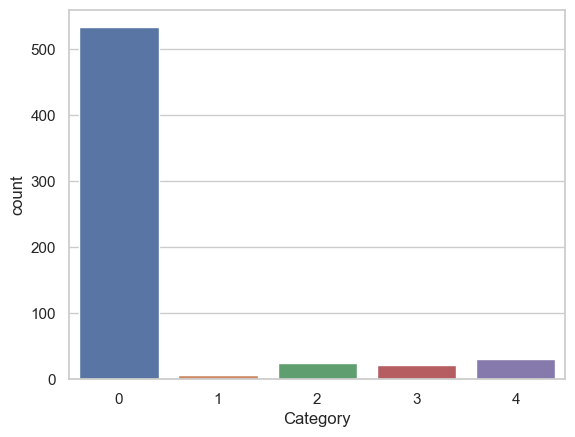

In [17]:
sns.countplot(x = 'Category', data = hcv) # 540 healthy people, 75 sick people

In [18]:
hcv = hcv[['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT', 'Outcome']]
hcv.head()
# I am changing the order of the columns so that Outcome is at the end

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Outcome
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0
3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0
4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0


In [19]:
hcv.nunique()

Age         49
Sex          2
ALB        190
ALP        415
ALT        342
AST        297
BIL        188
CHE        407
CHOL       314
CREA       117
GGT        358
PROT       199
Outcome      2
dtype: int64

In [20]:
hcv.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Age,615.0,47.41,10.06,19.00,39.00,47.00,54.00,77.00
Sex,615.0,0.61,0.49,0.00,0.00,1.00,1.00,1.00
ALB,615.0,41.55,6.01,0.00,38.80,41.90,45.20,82.20
ALP,615.0,66.29,28.11,0.00,51.70,65.30,79.30,416.60
ALT,615.0,28.40,25.47,0.00,16.40,23.00,33.05,325.30
AST,615.0,34.79,33.09,10.60,21.60,25.90,32.90,324.00
BIL,615.0,11.40,19.67,0.80,5.30,7.30,11.20,254.00
CHE,615.0,8.20,2.21,1.42,6.94,8.26,9.59,16.41
CHOL,615.0,5.28,1.31,0.00,4.58,5.29,6.06,9.67
CREA,615.0,81.29,49.76,8.00,67.00,77.00,88.00,1079.10


In [21]:
np.sort(hcv['Outcome'].unique())

array([0, 1])

Data designation:
* Age of people from 19 to 77
* both sexes
* albumin [ALB] from 0 to 82.20
* alkaline phosphatase [ALP] from 0 to 416.60
* alanine aminotransferase [ALT] 0 to 325.30
* alanine aminotransferase [AST] from 10.60 to 324.00
* bilirubin [BIL] from 0.80 to 254.
* choline esterase [CHE] from 1.42 to 16.41
* cholesterol [CHOL] from 0 to 9.67
* creatinine [CREA] from 8.00 to 1079.10
* gamma-glutamyltransferase [GGT] from 4.50 to 650.90
* [PROT] from 6/13 to 90:00
* Category:
- 0 = Blood Donor
- 1 = suspect Blood Donor
- 2 - Hepatitis
- 3 - Fibrosis
- 4 - Cirrhosis
* Outcome:
- 1 - healthy person (Blood Donor and suspect Blood Donor)
- 2 - sick person (other)

In [22]:
hcv.Outcome.value_counts() # 540 healthy people, 75 sick people
# large data disproportion

Outcome
0    540
1     75
Name: count, dtype: int64

In [23]:
hcv.Outcome.value_counts(normalize = True).round(2) # %

Outcome
0    0.88
1    0.12
Name: proportion, dtype: float64

<Axes: xlabel='Outcome', ylabel='count'>

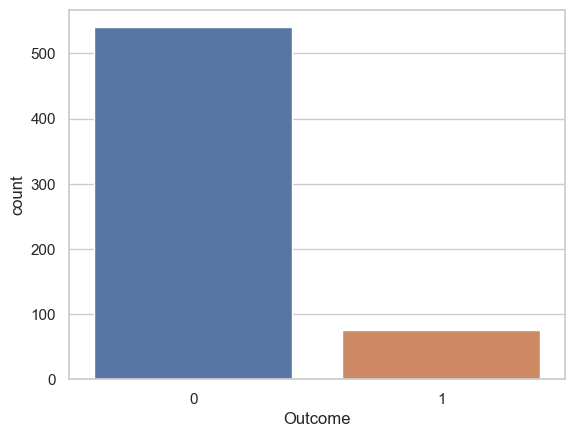

In [24]:
sns.countplot(x = 'Outcome', data = hcv)

In [25]:
hcv.Sex.value_counts() # 377 men, 238 women

Sex
1    377
0    238
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

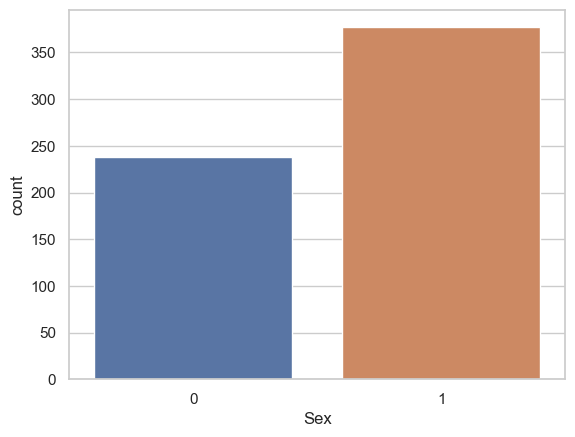

In [26]:
sns.countplot(x = 'Sex', data = hcv)

In [27]:
hcv.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Age,615.0,47.41,10.06,19.00,39.00,47.00,54.00,77.00
Sex,615.0,0.61,0.49,0.00,0.00,1.00,1.00,1.00
ALB,615.0,41.55,6.01,0.00,38.80,41.90,45.20,82.20
ALP,615.0,66.29,28.11,0.00,51.70,65.30,79.30,416.60
ALT,615.0,28.40,25.47,0.00,16.40,23.00,33.05,325.30
AST,615.0,34.79,33.09,10.60,21.60,25.90,32.90,324.00
BIL,615.0,11.40,19.67,0.80,5.30,7.30,11.20,254.00
CHE,615.0,8.20,2.21,1.42,6.94,8.26,9.59,16.41
CHOL,615.0,5.28,1.31,0.00,4.58,5.29,6.06,9.67
CREA,615.0,81.29,49.76,8.00,67.00,77.00,88.00,1079.10


In [28]:
# division of data into numerical and categorical data
numerical = hcv[['Age', 'ALB', 'ALP', 'AST', 'ALT', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']]
categorical = hcv[['Sex', 'Outcome']]
numerical_outcome = hcv[['Age', 'ALB', 'ALP', 'ALT', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT', 'Outcome']]

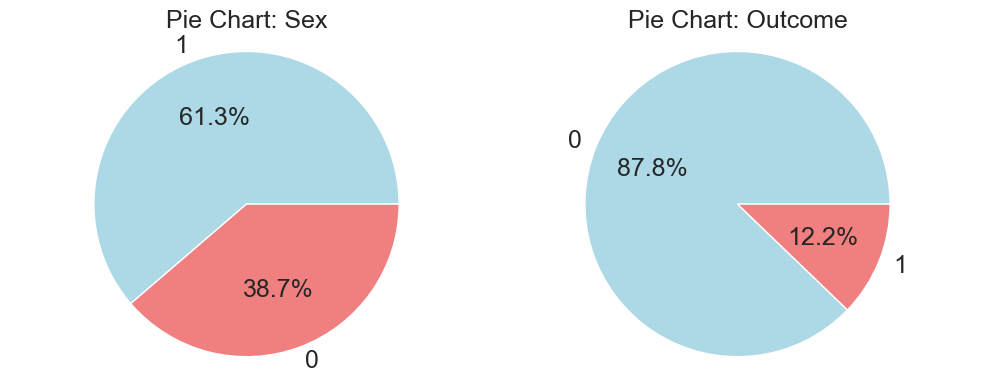

In [29]:
num_columns = len(categorical.columns)
num_rows = num_columns // 2 + num_columns % 2

plt.figure(figsize=(10, num_rows * 4))

for idx, column in enumerate(categorical.columns):
    plt.subplot(num_rows, 2, idx + 1)
    category_counts = categorical[column].value_counts()
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral', 'lightyellow', 'pink', 'plum'], textprops={'fontsize': 18})
    plt.title(f'Pie Chart: {column}', fontsize=18)
    plt.axis('equal')

plt.tight_layout()

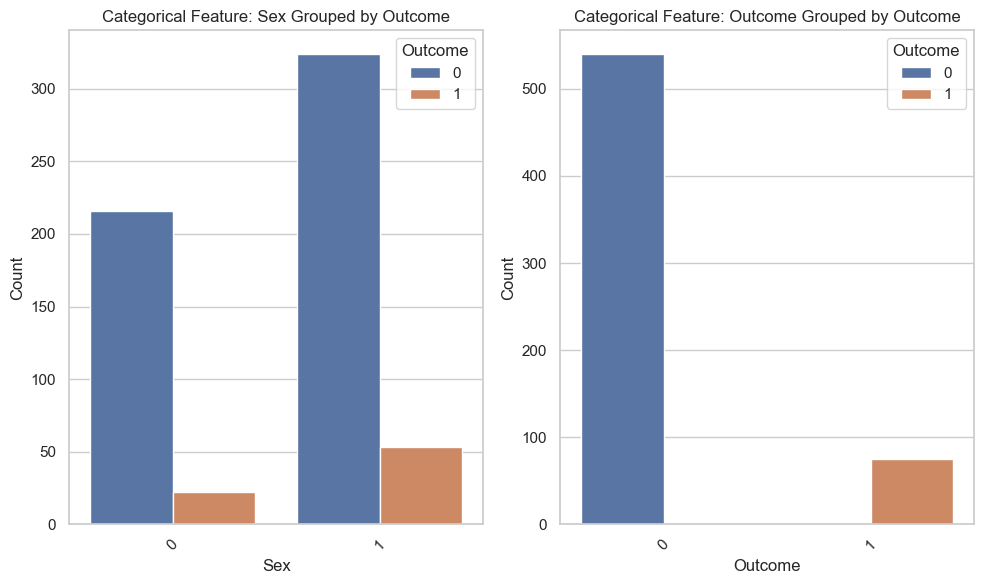

In [30]:
num_columns = len(categorical.columns)
num_rows = num_columns // 2 + num_columns % 2  

plt.figure(figsize=(10, num_rows * 6))

for idx, column in enumerate(categorical.columns):
    plt.subplot(num_rows, 2, idx+1)
    sns.countplot(data=categorical, x=column, hue='Outcome')
    plt.title(f'Categorical Feature: {column} Grouped by Outcome')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()

### Now I have to handle zero values and outliers.

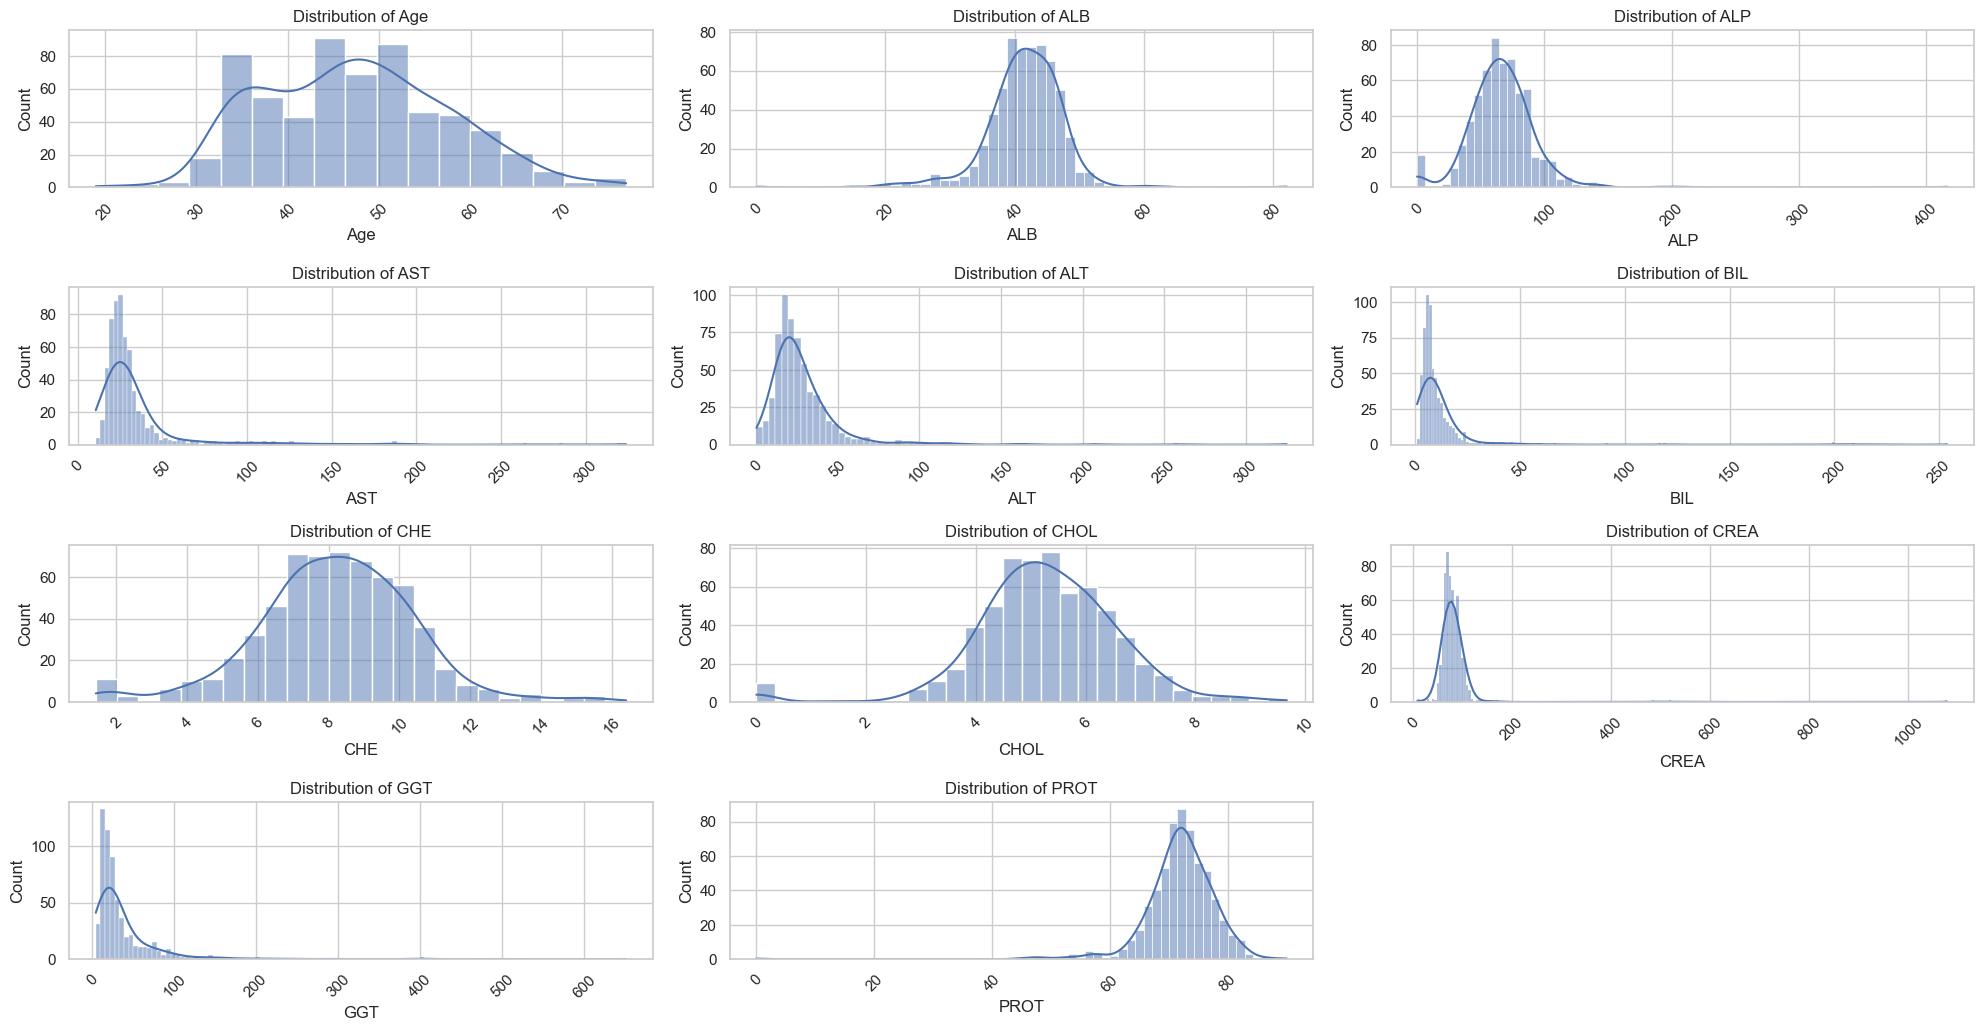

In [31]:
num_columns = len(numerical.columns)
num_rows = num_columns // 2 + num_columns % 2

plt.figure(figsize=(20, 15))

for idx, column in enumerate(numerical.columns):
    plt.subplot(num_rows, 3, idx + 1)
    sns.histplot(data=numerical, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()

In [32]:
print(numerical.isin({0}).sum())

Age      0
ALB      1
ALP     18
AST      0
ALT      1
BIL      0
CHE      0
CHOL    10
CREA     0
GGT      0
PROT     1
dtype: int64


In [33]:
hcv.to_csv('hcv_bez_zmian.csv', index=False)

In [34]:
hcv_new = hcv.copy() # copy of the dataset

In [35]:
hcv_new.isin({0}).sum()

Age          0
Sex        238
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
Outcome    540
dtype: int64

### I am removing zero values for healthy patients. The number of healthy patients is very large; I should not lose important data.

In [36]:
hcv_new[(hcv_new['CHOL'] == 0) & (hcv_new['Outcome'] == 0)]

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Outcome
121,43,1,48.6,45.0,10.5,40.5,5.3,7.09,0.0,63.0,25.1,70.0,0
319,32,0,47.4,52.5,19.1,17.1,4.6,10.19,0.0,63.0,23.0,72.2,0
329,33,0,42.4,137.2,14.2,13.1,3.4,8.23,0.0,48.0,25.7,74.4,0
413,46,0,42.9,55.1,15.2,29.8,3.6,8.37,0.0,61.0,29.0,71.9,0
424,48,0,45.6,107.2,24.4,39.0,13.8,9.77,0.0,88.0,38.0,75.1,0
433,48,0,46.8,93.3,10.0,23.2,4.3,12.41,0.0,52.0,23.9,72.4,0
498,57,0,48.4,94.4,2.5,39.6,2.3,8.84,0.0,82.0,6.4,76.8,0


In [37]:
hcv_new = hcv_new.drop(hcv_new[(hcv_new['CHOL'] == 0) & (hcv_new['Outcome'] == 0)].index)
hcv_new[(hcv_new['CHOL'] == 0) & (hcv_new['Outcome'] == 0)] # successfully removed

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Outcome


In [38]:
# Observation of rows with null values
numerical_columns = ['Age', 'ALB', 'ALP', 'ALT', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
for index, row in hcv_new.iterrows():
    if (row[numerical_columns] == 0).any():
        print("Row Index:", index)
        print(row)
        print("=" * 40) 

Row Index: 540
Age        38.00
Sex         1.00
ALB        45.00
ALP        56.30
ALT         0.00
AST        33.10
BIL         7.00
CHE         9.58
CHOL        6.00
CREA       77.90
GGT        18.90
PROT       63.00
Outcome     1.00
Name: 540, dtype: float64
Row Index: 541
Age        19.00
Sex         1.00
ALB        41.00
ALP         0.00
ALT        87.00
AST        67.00
BIL        12.00
CHE         7.55
CHOL        3.90
CREA       62.00
GGT        65.00
PROT       75.00
Outcome     1.00
Name: 541, dtype: float64
Row Index: 545
Age        29.00
Sex         1.00
ALB        49.00
ALP         0.00
ALT        53.00
AST        39.00
BIL        15.00
CHE         8.79
CHOL        3.60
CREA       79.00
GGT        37.00
PROT       90.00
Outcome     1.00
Name: 545, dtype: float64
Row Index: 546
Age        30.00
Sex         1.00
ALB        45.00
ALP         0.00
ALT        66.00
AST        45.00
BIL        14.00
CHE        12.16
CHOL        6.10
CREA       86.00
GGT        43.00
PROT       7

### The other variables are values for patients who are sick, and these data I don't want to lose because I have a small sample of patients.

<Figure size 2000x500 with 0 Axes>

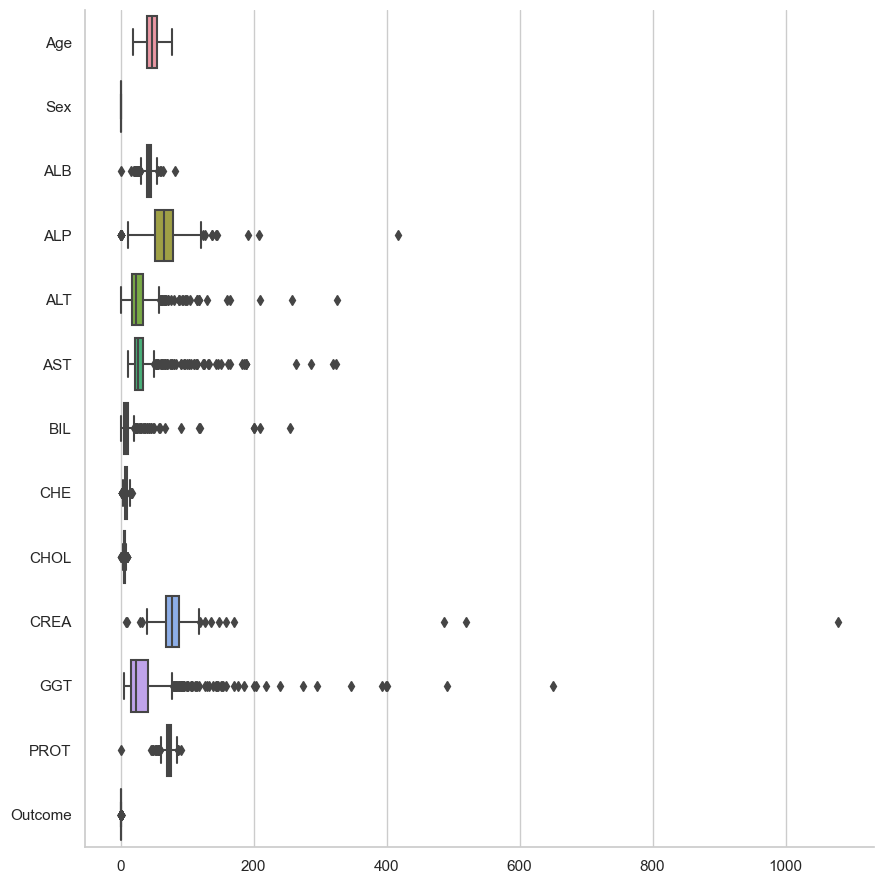

In [39]:
plt.figure(figsize=(20, 5))
sns.catplot(data = hcv_new, height = 9, kind = 'box', orient='h')

### There are outliers, so it will be better to use the median rather than the mean to replace the null values.
### In order to get the most reliable data, I will calculate the median only for the results of sick patients [Outcome == 1] to replace the zero values for sick patients. This way I won't have to delete many rows, which would involve data loss, and I won't falsify the data by calculating the median for all patients, both sick and healthy (who make up the majority of the results).

In [40]:
hcv_new.isin({0}).sum()

Age          0
Sex        232
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL         3
CREA         0
GGT          0
PROT         1
Outcome    533
dtype: int64

In [41]:
zero_columns = ['PROT', 'CHOL', 'ALT', 'ALP', 'ALB'] # I take only the columns where there were zero values
for column in zero_columns:
    med = hcv_new[(hcv_new[column] != 0) & (hcv_new['Outcome'] == 1)][column].median() # I calculate the median for non-zero values, where Outcome == 1
    print(column)
    print('Mediana:', med)
    hcv_new.loc[(hcv_new[column] == 0) & (hcv_new['Outcome'] == 1), column] = med # I replace the zero values with the calculated median

PROT
Mediana: 72.9
CHOL
Mediana: 4.38
ALT
Mediana: 14.95
ALP
Mediana: 41.6
ALB
Mediana: 39.5


In [42]:
hcv_new.isin({0}).sum() # succeeded in replacing zero with median for sick people

Age          0
Sex        232
ALB          0
ALP          0
ALT          0
AST          0
BIL          0
CHE          0
CHOL         0
CREA         0
GGT          0
PROT         0
Outcome    533
dtype: int64

### Now I need to focus on the outliers.

In [43]:
# new data division into numerical and categorical data:
numerical_new = hcv_new[['Age', 'ALB', 'ALP', 'AST', 'ALT', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']]
categorical_new = hcv_new[['Sex', 'Outcome']]
numerical_outcome = hcv_new[['Age', 'ALB', 'ALP', 'AST', 'ALT', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT', 'Outcome']]

In [44]:
# np.sort(numerical_outcome['CREA'].unique())

### A creatinine result above 100 mg/dL is very dangerous and indicates kidney disease or failure. Therefore, top 3 results are not possible and indicate errors. It is possible that someone made a mistake while typing and inserted the commas incorrectly. 485.9, 519. , 1079.1

In [45]:
numerical_outcome[numerical_outcome['CREA'].isin([485.9, 519., 1079.1])]
# min outlier values are possible
# I would leave 485.9 however, because line 606 is also an outlier for ALP; I would leave 519 too
# But I would replace the value of sick people with the median value of 1079.1, because it is very different, unlikely and may simply be an error

,Age,ALB,ALP,AST,ALT,BIL,CHE,CHOL,CREA,GGT,PROT,Outcome
586,39,34.0,137.8,35.6,4.8,9.0,3.65,4.82,519.0,133.4,57.5,1
591,46,35.0,109.6,19.2,2.3,11.0,7.10,4.10,1079.1,105.6,69.1,1
606,49,33.0,190.7,36.3,1.2,7.0,6.92,3.82,485.9,112.0,58.5,1


In [46]:
# np.sort(numerical_outcome['ALB'].unique())

In [47]:
numerical_outcome[numerical_outcome['ALB'].isin([82.2, 62.9, 59.8])] # I think these results are possible; these people do not necessarily have HCV, but they have high levels of creatinine, among other things, which may indicate kidney disease
# I would remove the entire record 82.2, because it is a healthy person, but probably with other diseases

,Age,ALB,ALP,AST,ALT,BIL,CHE,CHOL,CREA,GGT,PROT,Outcome
216,52,82.2,82.2,23.7,37.0,7.8,8.90,6.09,77.0,87.8,67.4,0
346,35,62.9,51.2,23.0,20.7,2.9,6.33,4.62,67.0,15.2,71.9,0
405,45,59.8,59.8,17.4,13.2,6.9,5.62,6.42,70.0,12.3,66.6,0


In [48]:
numerical_outcome[numerical_outcome['ALB'].isin([14.9])] # minimum score does not seem to be an error; this is an elderly person who has a lot of low scores, which may be due to various deficiencies

,Age,ALB,ALP,AST,ALT,BIL,CHE,CHOL,CREA,GGT,PROT,Outcome
537,71,14.9,69.8,95.2,19.7,9.8,13.3,2.61,9.0,7.6,47.0,0


In [49]:
# np.sort(numerical_outcome['ALP'].unique())

In [50]:
numerical_outcome[numerical_outcome['ALP'].isin([416.6, 208.2, 190.7])] # 190.7 seems possible, so does 208.2;
# for 190.7 there is also an outlier for creatinine 
# I am not sure about the result of 416.6, it is clearly an outlier, but it also has an outlier for GGT, so maybe this is a very sick person? 
# I would leave all the results

,Age,ALB,ALP,AST,ALT,BIL,CHE,CHOL,CREA,GGT,PROT,Outcome
539,59,19.3,208.2,146.6,325.3,6.9,5.33,4.72,32.0,295.6,53.1,0
606,49,33.0,190.7,36.3,1.2,7.0,6.92,3.82,485.9,112.0,58.5,1
610,62,32.0,416.6,110.3,5.9,50.0,5.57,6.30,55.7,650.9,68.5,1


In [51]:
# np.sort(numerical_outcome['ALT'].unique())

In [52]:
numerical_outcome[numerical_outcome['ALT'].isin([208.8, 258, 325.3])] # a result of 325.3 is very high, but may indicate serious liver disease
# I would leave these values

,Age,ALB,ALP,AST,ALT,BIL,CHE,CHOL,CREA,GGT,PROT,Outcome
536,55,47.3,106.0,130.6,208.8,0.8,14.80,8.08,76.0,71.6,78.3,0
539,59,19.3,208.2,146.6,325.3,6.9,5.33,4.72,32.0,295.6,53.1,0
570,50,42.0,41.6,106.0,258.0,15.0,8.74,4.70,77.0,80.0,84.0,1


In [53]:
# np.sort(numerical_outcome['AST'].unique())

In [54]:
numerical_outcome[numerical_outcome['AST'].isin([285.8, 319.8, 324.])]
# leaving; outliers may indicate disease

,Age,ALB,ALP,AST,ALT,BIL,CHE,CHOL,CREA,GGT,PROT,Outcome
558,56,37.0,114.0,324.0,27.8,67.0,5.75,3.09,97.7,392.2,77.3,1
595,56,27.0,81.1,319.8,17.0,37.0,1.42,3.54,66.9,93.7,65.3,1
609,59,39.0,51.3,285.8,19.6,40.0,5.77,4.51,136.1,101.1,70.5,1


In [55]:
# np.sort(numerical_outcome['BIL'].unique())

In [56]:
numerical_outcome[numerical_outcome['BIL'].isin([200., 209., 254.])]
# high bilirubin levels may indicate liver disease

,Age,ALB,ALP,AST,ALT,BIL,CHE,CHOL,CREA,GGT,PROT,Outcome
587,41,31.0,85.3,60.2,4.8,200.0,1.80,5.34,106.4,151.0,71.8,1
590,46,20.0,41.6,113.0,62.0,254.0,1.48,4.38,114.0,138.0,72.9,1
600,59,27.0,73.8,65.2,4.0,209.0,2.47,3.61,71.7,28.5,60.6,1
605,42,33.0,79.0,55.7,3.7,200.0,1.72,5.16,89.1,146.3,69.9,1


In [57]:
# np.sort(numerical_outcome['GGT'].unique())

In [58]:
numerical_outcome[numerical_outcome['GGT'].isin([400.3, 491. , 650.9])] # probable values

,Age,ALB,ALP,AST,ALT,BIL,CHE,CHOL,CREA,GGT,PROT,Outcome
559,58,43.0,99.1,63.2,12.2,13.0,5.95,6.15,147.3,491.0,65.6,1
602,61,39.0,102.9,143.2,27.3,15.0,5.38,4.88,72.3,400.3,73.4,1
610,62,32.0,416.6,110.3,5.9,50.0,5.57,6.30,55.7,650.9,68.5,1


In [59]:
# np.sort(numerical_outcome['PROT'].unique())

In [60]:
numerical_outcome[numerical_outcome['PROT'].isin([44.8, 47., 47.8, 90.])]

,Age,ALB,ALP,AST,ALT,BIL,CHE,CHOL,CREA,GGT,PROT,Outcome
534,48,24.9,116.9,24.3,49.2,4.9,3.44,5.25,29.0,83.0,47.8,0
535,49,21.6,42.2,10.6,9.5,2.4,3.75,3.01,64.0,38.9,44.8,0
537,71,14.9,69.8,95.2,19.7,9.8,13.30,2.61,9.0,7.6,47.0,0
538,74,20.3,84.0,43.0,22.8,5.7,4.91,3.19,52.0,218.3,47.8,0
545,29,49.0,41.6,39.0,53.0,15.0,8.79,3.60,79.0,37.0,90.0,1


### After a thorough analysis of outliers, I would remove the line where ALB == 82.2, and for CREA replace the value of 1079.1 with the median calculated for sick people

In [61]:
rows_to_drop = hcv_new[hcv_new['ALB'] == 82.2].index
hcv_new = hcv_new.drop(rows_to_drop)
print(hcv_new[hcv_new['ALB'] == 82.2]) # successfully deleted

Empty DataFrame
Columns: [Age, Sex, ALB, ALP, ALT, AST, BIL, CHE, CHOL, CREA, GGT, PROT, Outcome]
Index: []


In [62]:
med_crea = hcv_new[(hcv_new['Outcome'] == 1)]['CREA'].median()
print('Mediana:', med_crea)
hcv_new.loc[hcv_new['CREA'] == 1079.1, 'CREA'] = med_crea

Mediana: 70.9


In [63]:
hcv_new[hcv_new['GGT'].isin([105.6])] # managed to replace the error with the median

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Outcome
591,46,1,35.0,109.6,2.3,19.2,11.0,7.1,4.1,70.9,105.6,69.1,1


In [64]:
# division into appropriate categories
numerical_new = hcv_new[['Age', 'ALB', 'ALP', 'AST', 'ALT', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']]
categorical_new = hcv_new[['Sex', 'Outcome']]
numerical_outcome = hcv_new[['Age', 'ALB', 'ALP', 'AST', 'ALT', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT', 'Outcome']]

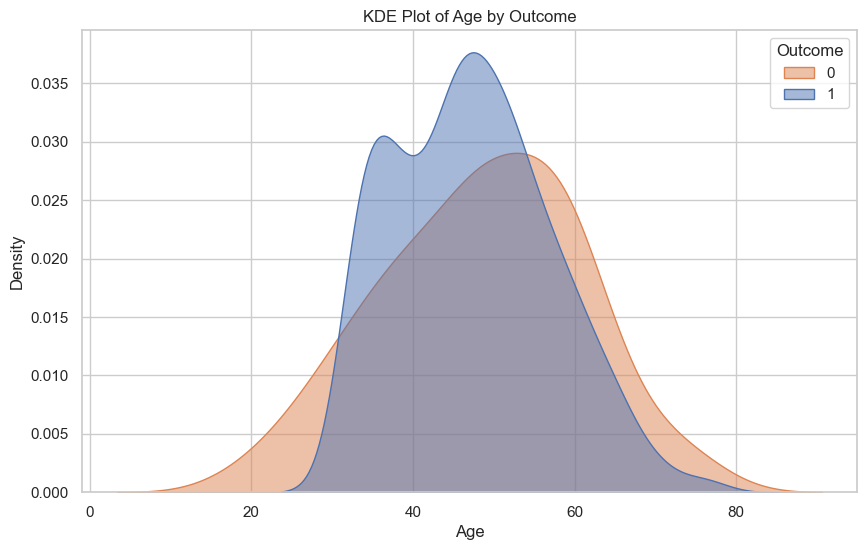

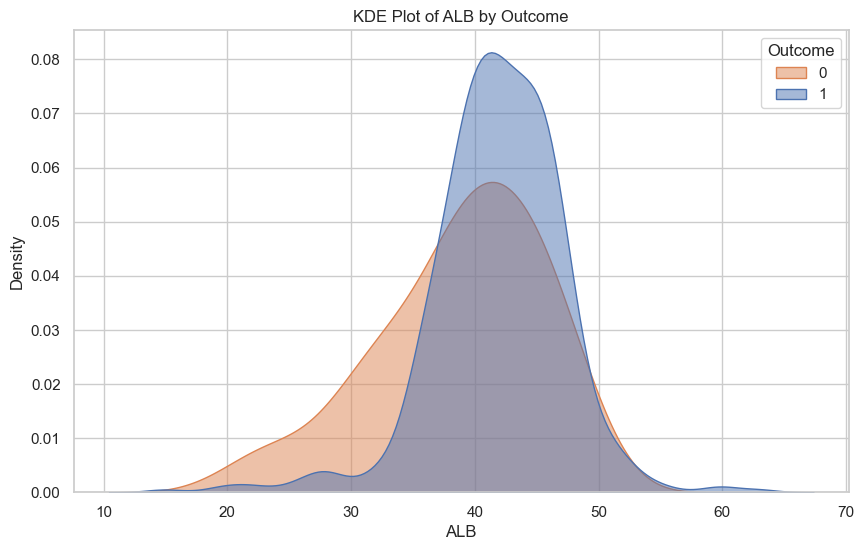

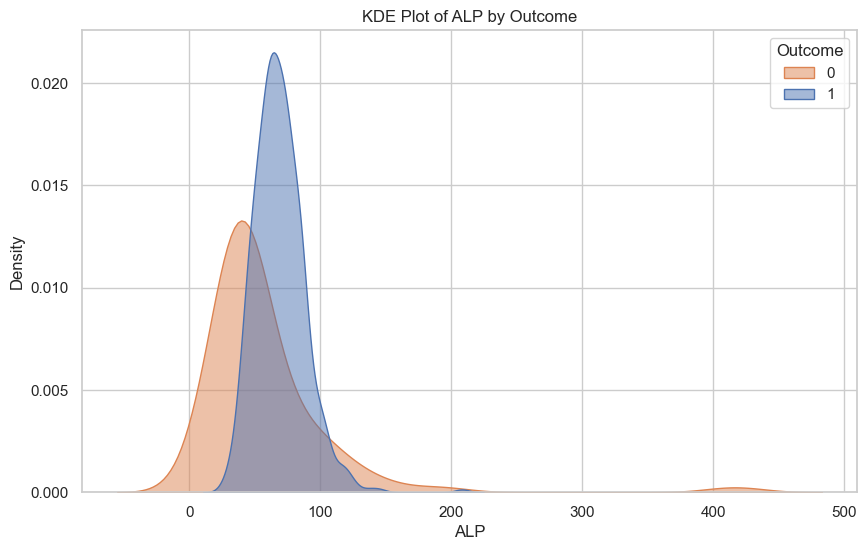

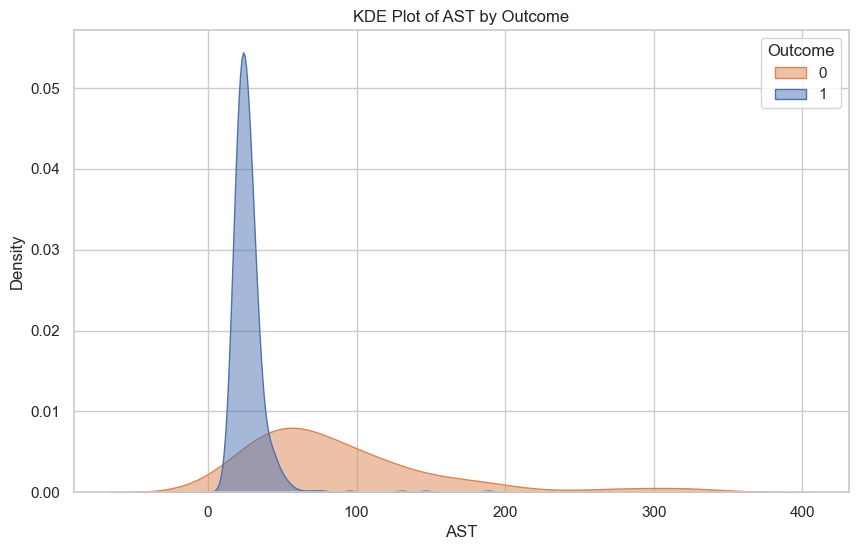

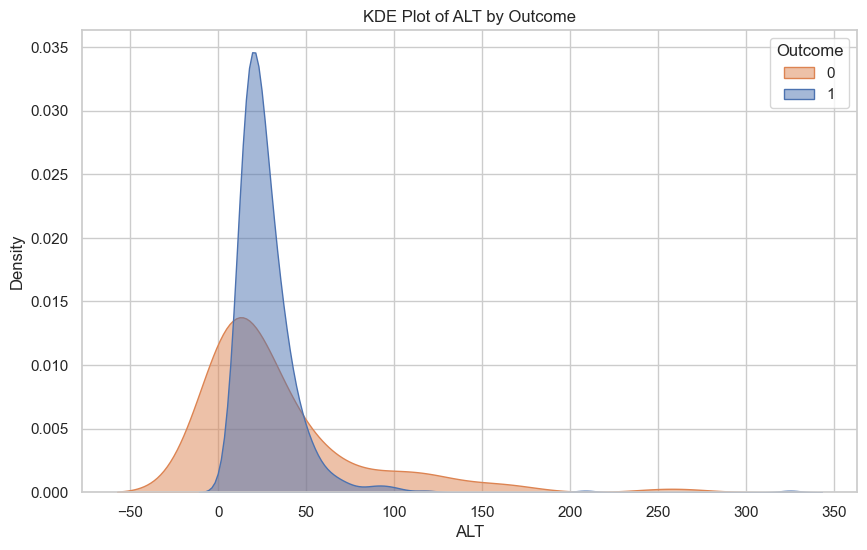

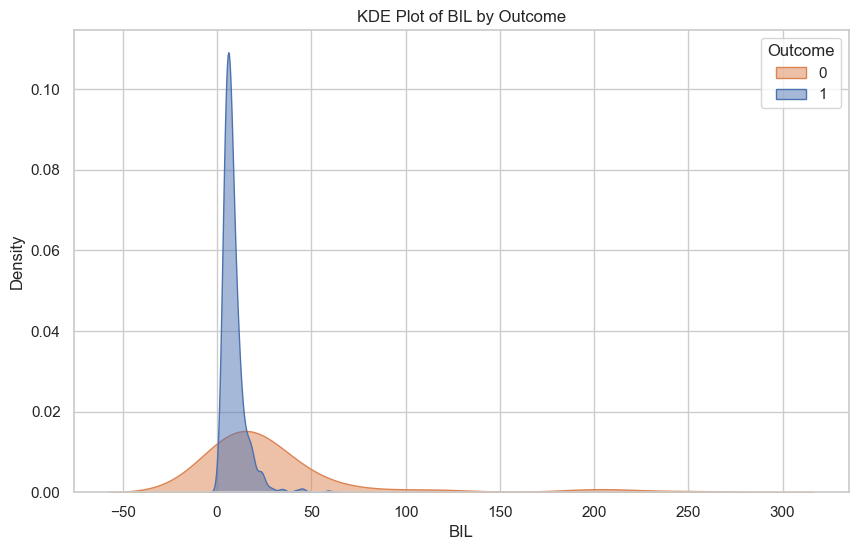

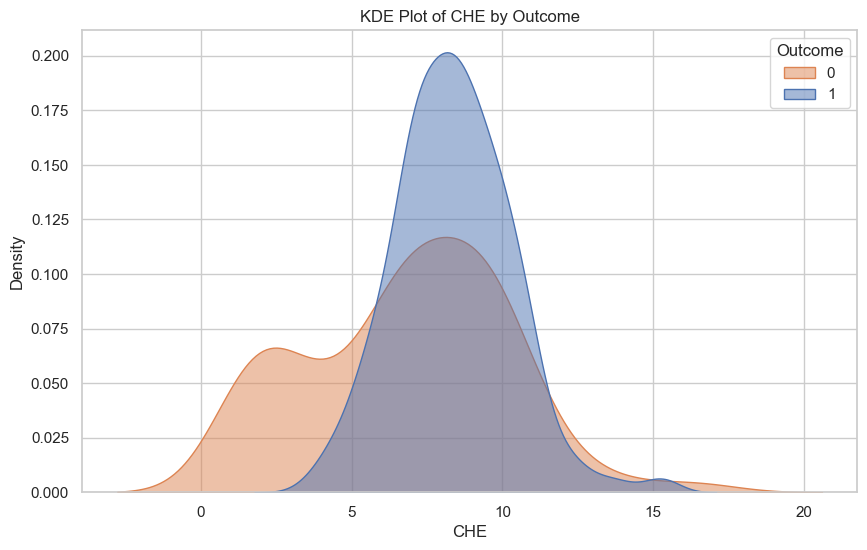

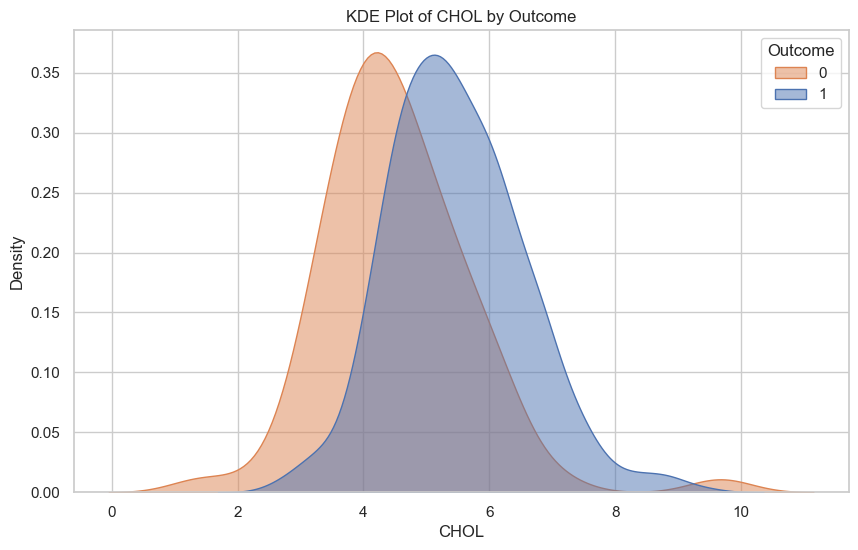

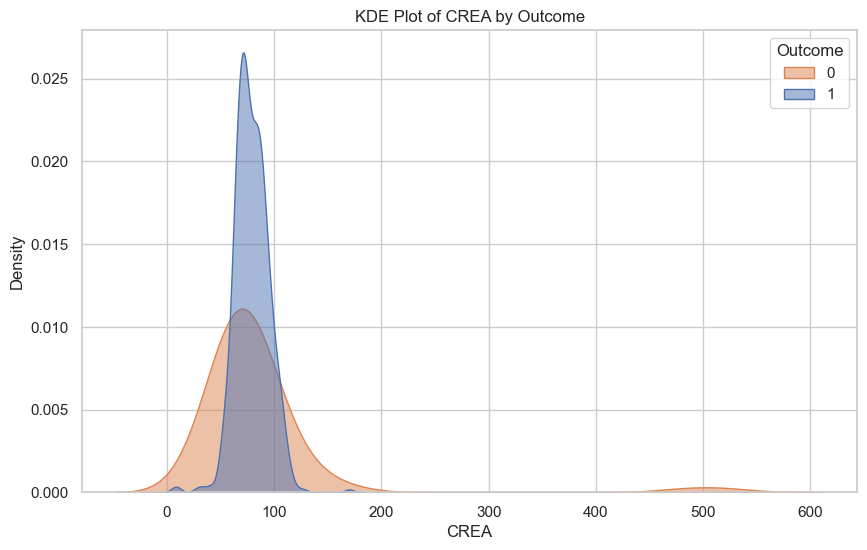

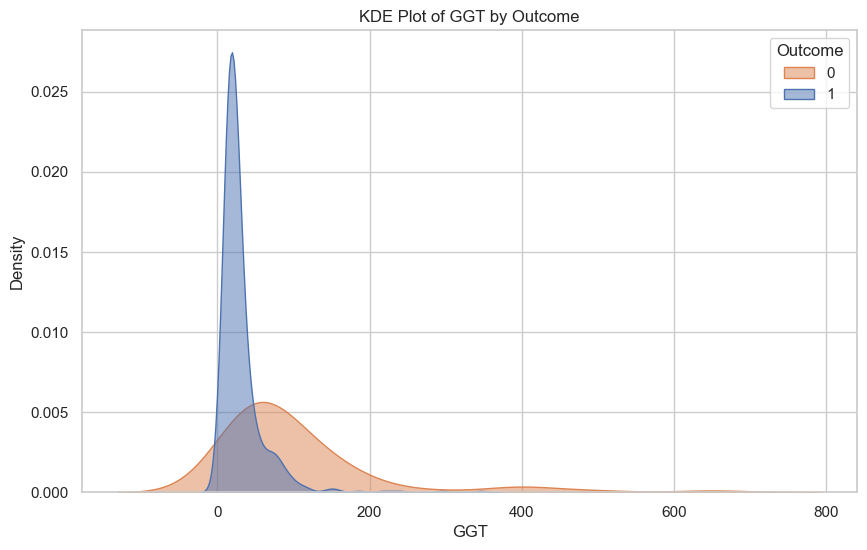

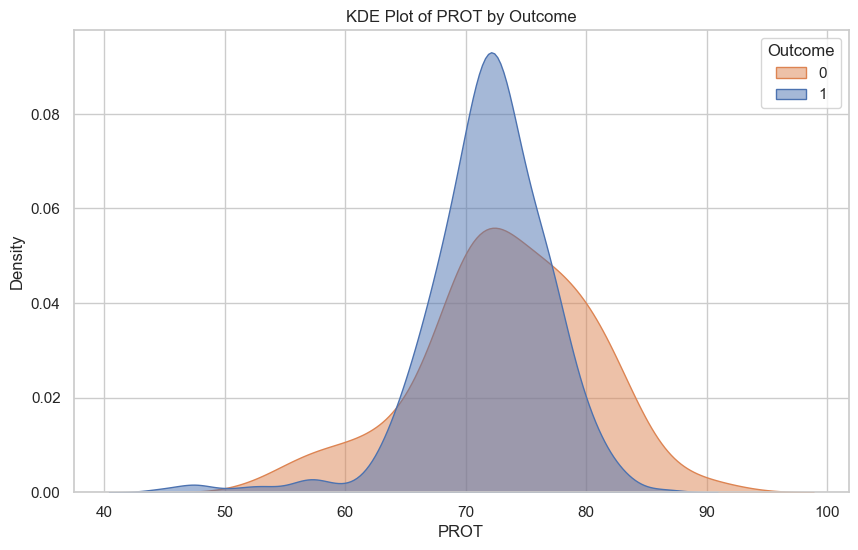

In [65]:
# KDE plot
for column in numerical_new:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=hcv_new, x=column, hue='Outcome', common_norm=False, fill=True, alpha=0.5)
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'KDE Plot of {column} by Outcome')
    plt.legend(title='Outcome', labels=['0', '1'])
    plt.show()

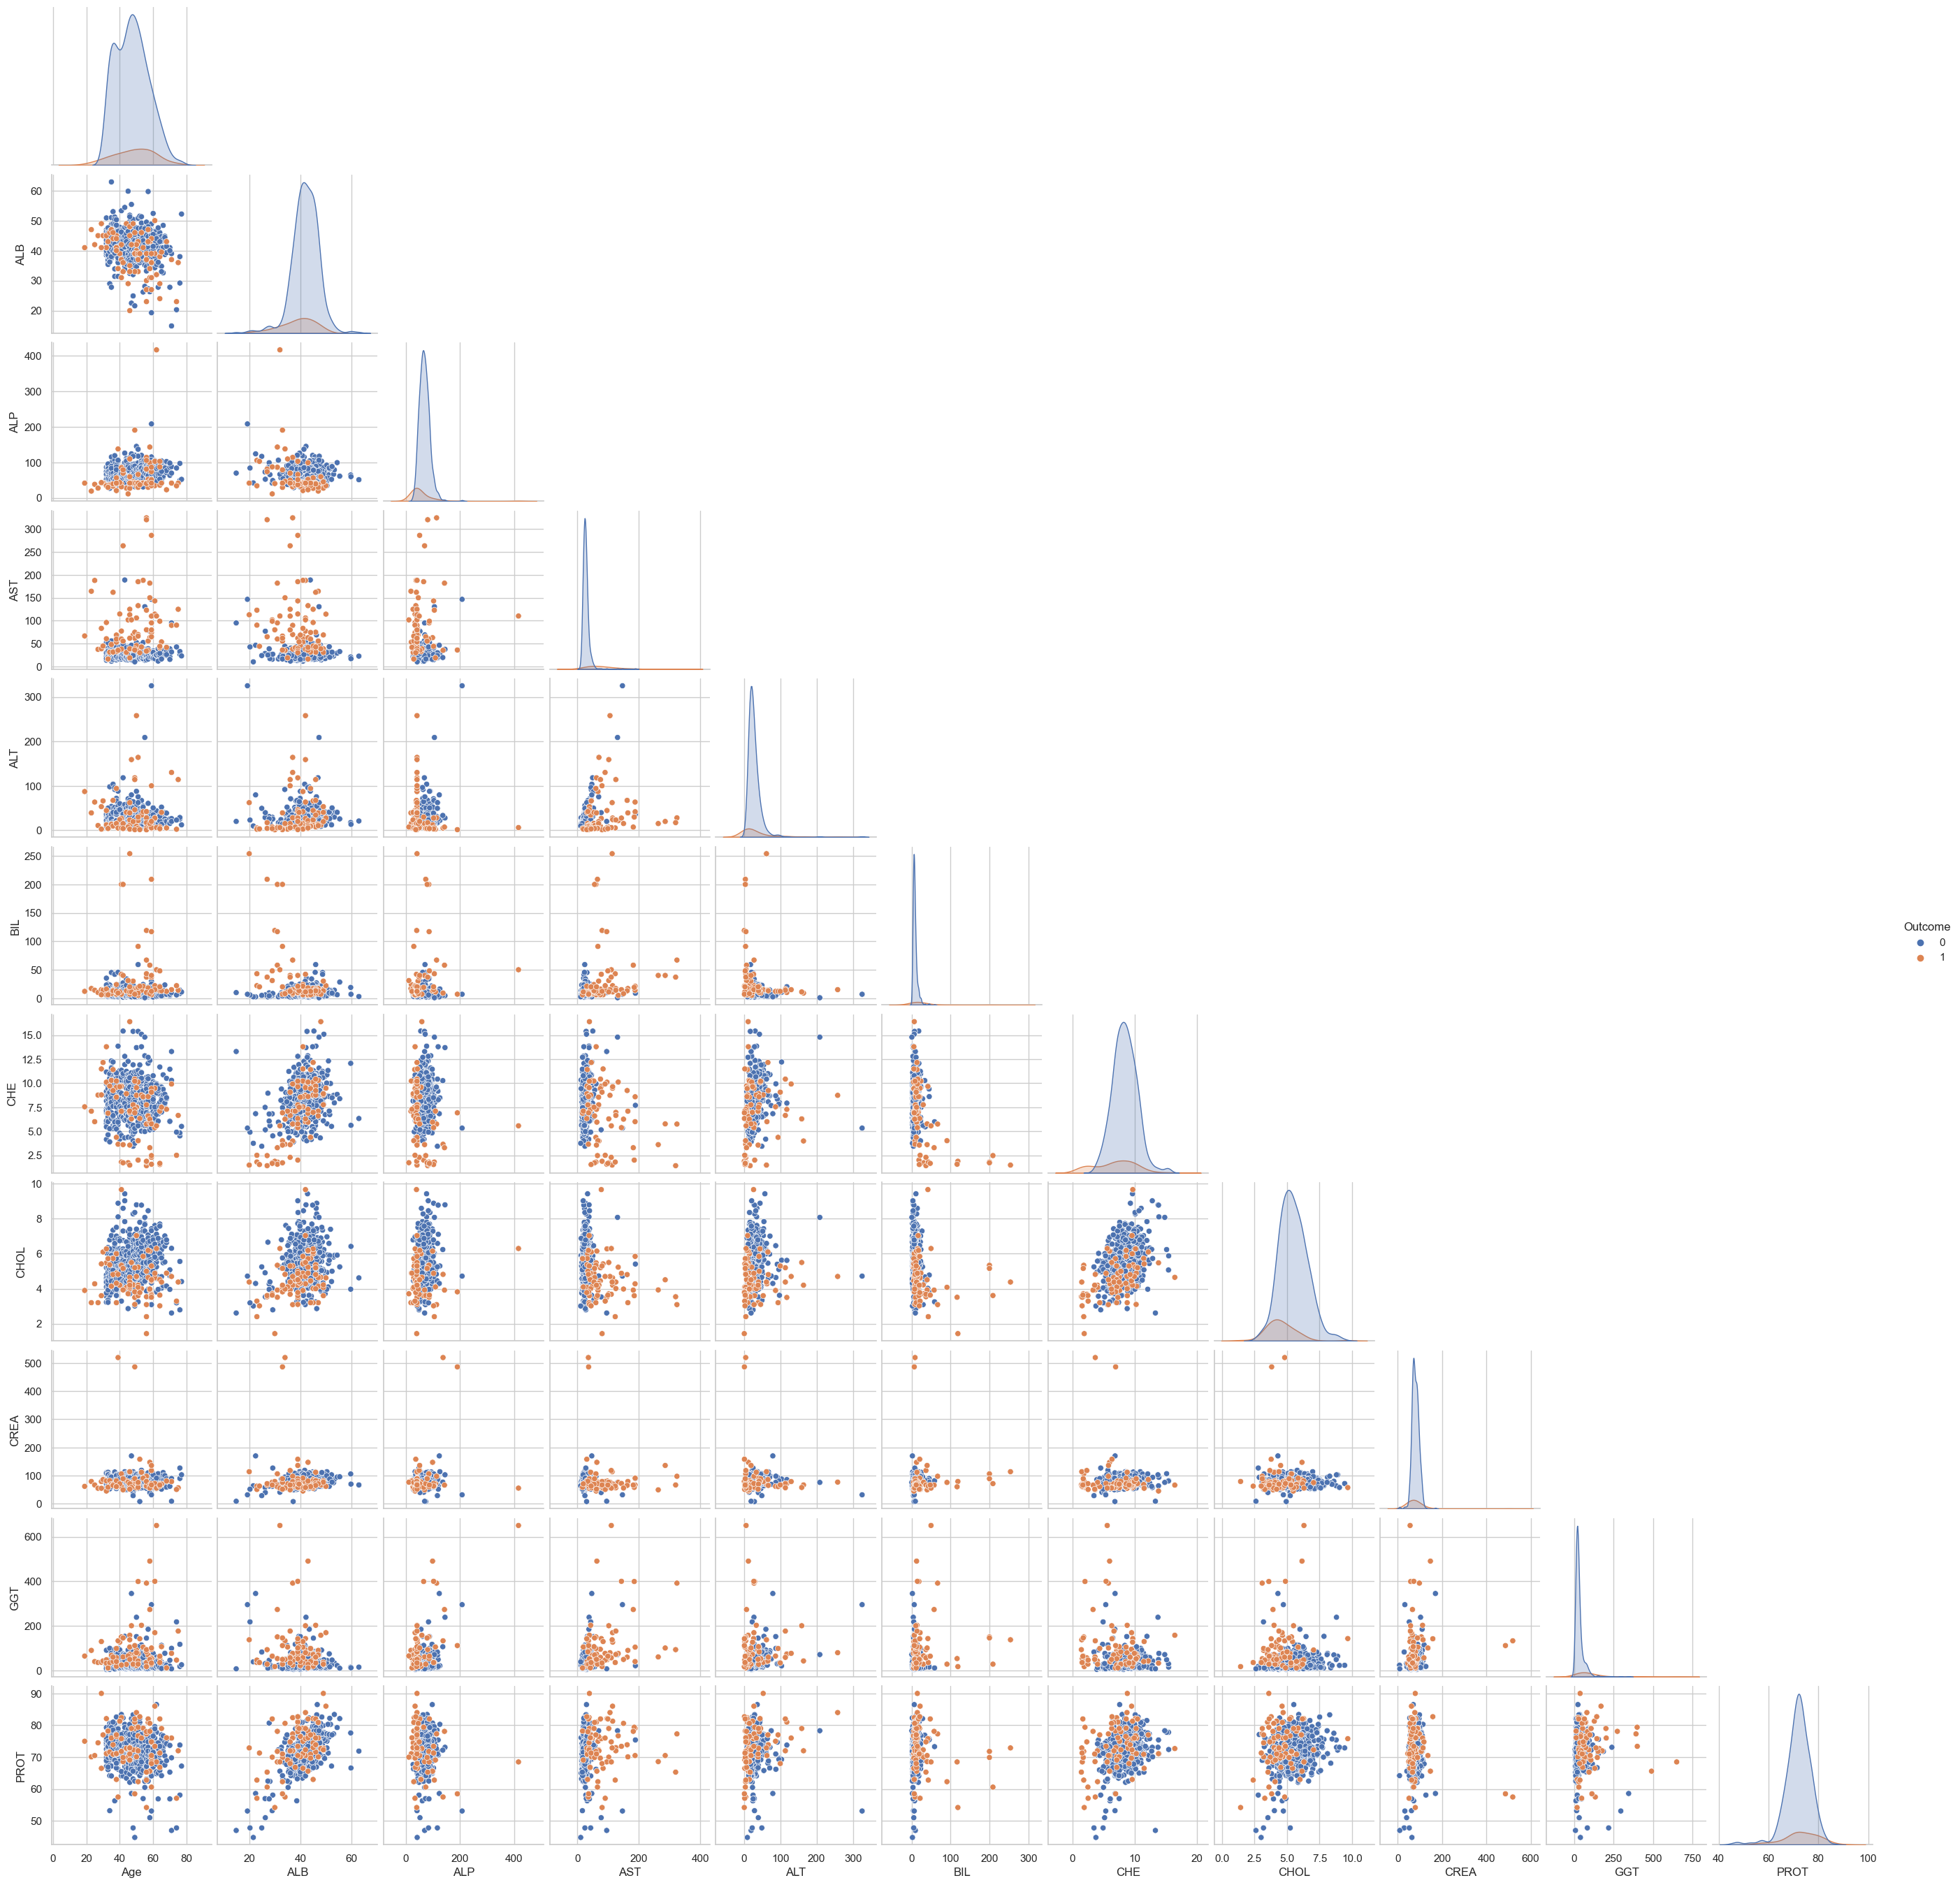

In [66]:
sns.pairplot(data = numerical_outcome, hue = 'Outcome', corner = True, diag_kind = 'kde')

Text(0.5, 1.0, 'Heatmap correlation')

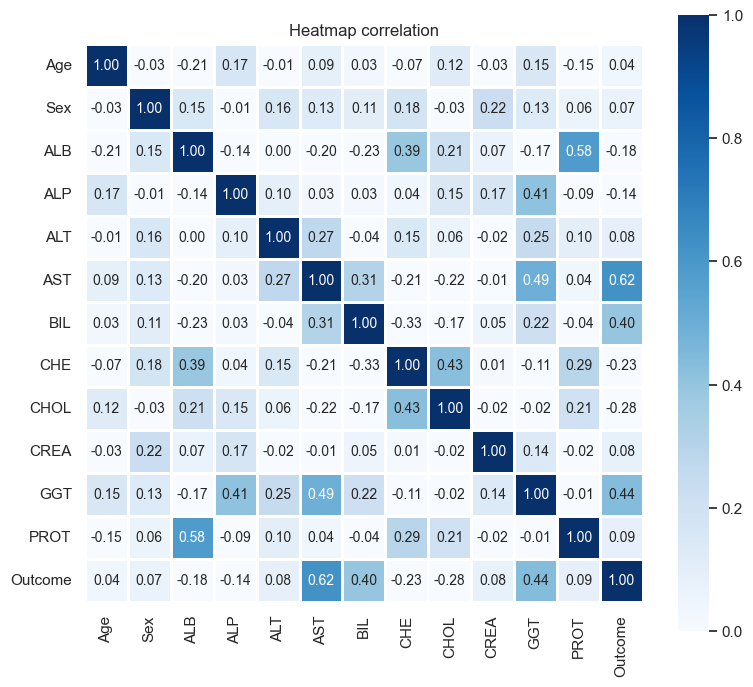

In [67]:
corr = hcv_new.corr()
plt.figure(figsize = (9, 8))
hm = sns.heatmap(corr, annot=True, linewidths=2, fmt='.2f', annot_kws={'size': 10}, vmax=1, vmin=0, square=True, cmap='Blues')
plt.title("Heatmap correlation")

Correlation between: Outcome and AST [0.62], Outcome and BIL [0.40], Outcome and GGT [0.44], PROT and ALB [0.58], GGT and ALT [0.40], AST and GGT [0.49], CHOL and CHE [0.43 ], GGT and ALP [0.41].

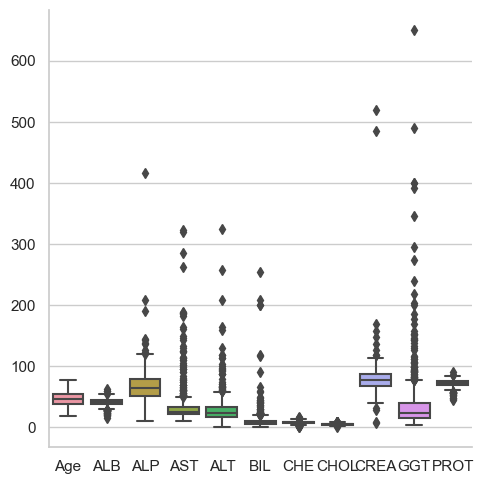

In [68]:
sns.catplot(data = numerical_new, height = 5, kind = 'box')

### There are still deviating values, but after analysis, they may indicate sick people - these are not errors.

In [69]:
hcv_new.to_csv('hcv_final.csv', index=False)

### Analysis complete.